In [1]:
# Import every package we need

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter, Constraint)

from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario, SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments, optimize
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [17]:
from visualization_functions import histogram_maker, mean_outcomes, aggregate_outcomes, scatter_maker, pairplot_maker, boxplot_histogram_maker

In [5]:
import pickle

results_MORO, convergence = pickle.load(open('Outcomes/MORO_s50_nfe20000.pkl', 'rb'))

In [6]:
# Initialize model parameters
from model.dike_model_function import DikeNetwork  # @UnresolvedImport
from model.problem_formulation import get_model_for_problem_formulation

dike_model, planning_steps = get_model_for_problem_formulation(5)

In [7]:
results_MORO

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Damage Score,Deaths Score,Dike Invest Score,RfR Invest Score,Evac Score
0,0,0,0,0,0,0,1,1,1,0,...,3,2,2,1,1,1.964370e+14,1.861056e-06,1.196531e+18,1.178112e+16,3.252648e+08
1,1,1,0,0,0,0,1,1,1,0,...,3,2,2,1,1,1.133849e+11,1.143893e-07,1.196531e+18,9.305655e+18,0.000000e+00
2,0,0,1,0,0,0,1,1,1,0,...,3,2,2,1,1,7.853715e+11,9.160793e-08,1.196531e+18,6.272040e+18,1.574746e+06
3,0,0,0,0,0,0,1,1,1,0,...,3,2,2,1,1,1.964370e+14,1.292400e-04,1.196531e+18,1.178112e+16,0.000000e+00
4,0,0,0,0,0,0,0,1,1,0,...,3,2,2,1,1,1.980599e+14,1.307336e-04,1.196531e+18,7.906444e+17,0.000000e+00
5,0,0,0,0,0,0,0,0,0,0,...,3,2,2,1,1,4.577942e+14,3.845736e-04,1.501146e+18,0.000000e+00,0.000000e+00
6,0,0,0,0,0,0,0,0,0,0,...,3,2,2,1,1,4.577942e+14,8.652907e-06,1.501146e+18,0.000000e+00,2.928564e+08
7,0,0,0,0,0,0,0,0,0,0,...,3,2,2,1,1,4.577942e+14,5.537860e-06,1.501146e+18,0.000000e+00,4.520066e+08
8,0,0,0,0,0,0,0,0,0,0,...,3,2,2,1,1,1.161485e+15,7.686822e-04,1.196531e+18,0.000000e+00,0.000000e+00


In [9]:
policies = []
for row in range(results.shape[0]):
    policies.append(
        Policy(name = row, **results_MORO.iloc[row,:-5].to_dict())  # Do not include the damage scores
    )

In [10]:
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results = evaluator.perform_experiments(scenarios=50,policies=policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 50 scenarios * 9 policies * 1 model(s) = 450 experiments
[MainProcess/INFO] 45 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 135 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 225 cases completed
[MainProcess/INFO] 270 cases completed
[MainProcess/INFO] 315 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 405 cases completed
[MainProcess/INFO] 450 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [13]:
# from ema_workbench.util.utilities import (save_results, load_results)

# save_results(results, "Outcomes/MOROpolicies50Scenarios.csv" )

[MainProcess/INFO] results saved successfully to C:\Users\newbi\project-local\Model-based-decision-making\Outcomes\MOROpolicies50Scenarios.csv


In [19]:
from ema_workbench.util.utilities import (save_results, load_results)

results = load_results('Outcomes/MOROpolicies50Scenarios.csv')

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)
results = experiments.join(outcomes)
results = results.drop(columns="model")
# results = results.apply(pd.to_numeric)
results.head()

[MainProcess/INFO] results loaded succesfully from C:\Users\newbi\project-local\Model-based-decision-making\Outcomes\MOROpolicies50Scenarios.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,127.0,259.003109,1.0,0.421409,213.671321,1.5,0.448436,135.833228,10.0,0.161736,...,5.639157e+07,0.0,0.0,5.585544e+07,0.0,0.0,6.071198e+07,0.0,30700000.0,0.0
1,22.0,191.168901,10.0,0.260907,118.779549,1.0,0.177489,171.354095,10.0,0.733073,...,5.639157e+07,0.0,0.0,5.585544e+07,0.0,0.0,6.071198e+07,0.0,30700000.0,0.0
2,19.0,171.660267,1.0,0.832451,61.004725,1.5,0.087174,280.106934,10.0,0.518614,...,5.639157e+07,0.0,0.0,5.585544e+07,0.0,0.0,6.071198e+07,0.0,30700000.0,0.0
3,76.0,181.444232,1.5,0.142348,283.583457,1.5,0.009052,73.406157,1.5,0.012465,...,5.639157e+07,0.0,0.0,5.585544e+07,0.0,0.0,6.071198e+07,0.0,30700000.0,0.0
4,92.0,301.583109,1.5,0.787057,172.858708,10.0,0.820435,144.178460,1.0,0.253245,...,5.639157e+07,0.0,0.0,5.585544e+07,0.0,0.0,6.071198e+07,0.0,30700000.0,0.0


Plot Expected Annual Damage(Histogram)
This is timestep 0


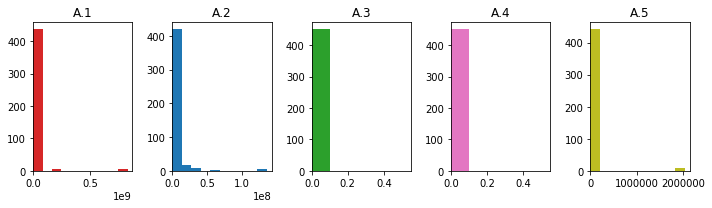

This is timestep 1


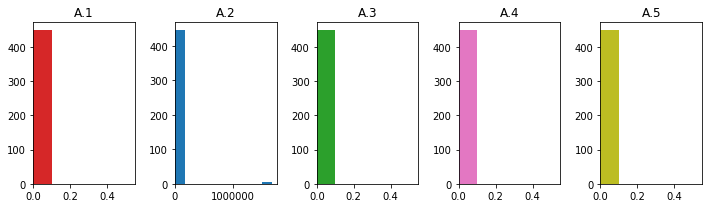

This is timestep 2


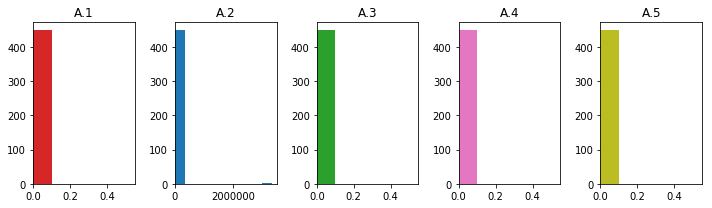

Plot Expected Number of Deaths(Histogram)
This is timestep 0


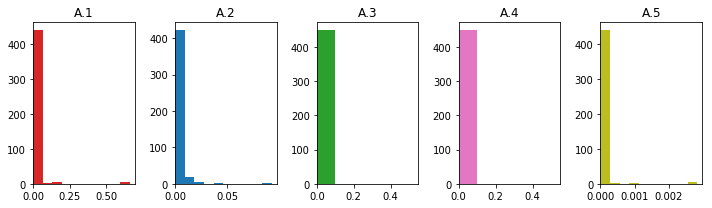

This is timestep 1


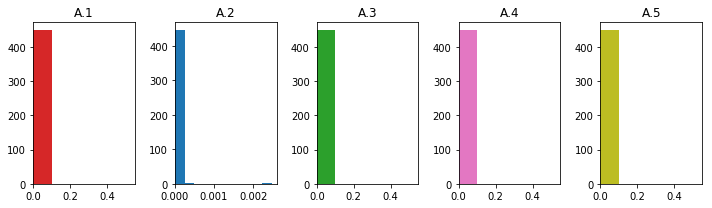

This is timestep 2


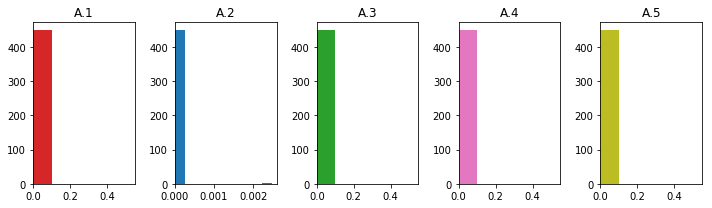

In [21]:
histogram_maker(results, "Expected Annual Damage")
histogram_maker(results, "Expected Number of Deaths")

No handles with labels found to put in legend.


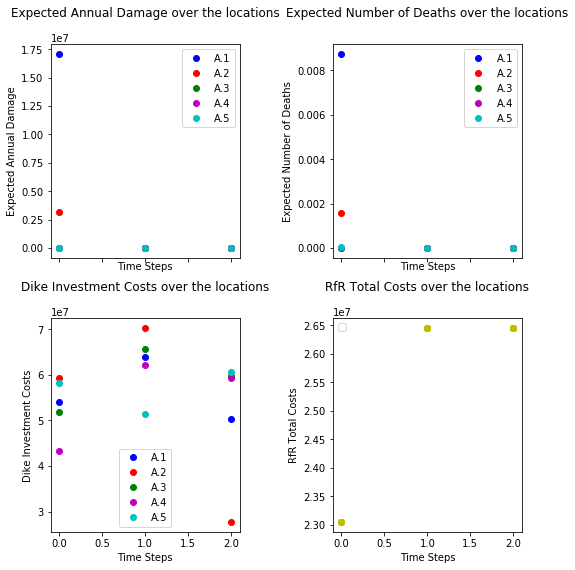

In [22]:
mean_outcomes(results)

Plot Expected Annual Damage(Scatterplot)
This is timestep 0


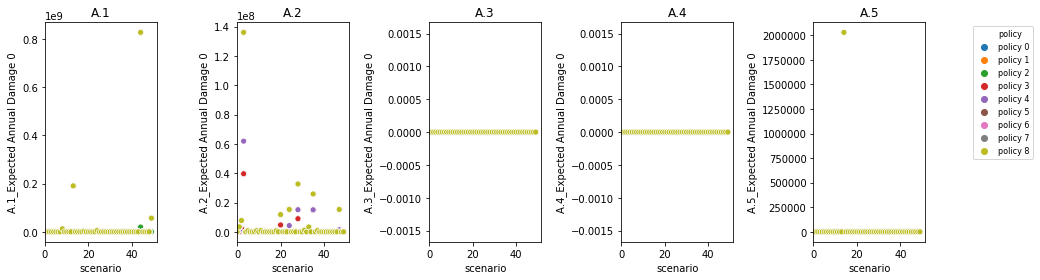

This is timestep 1


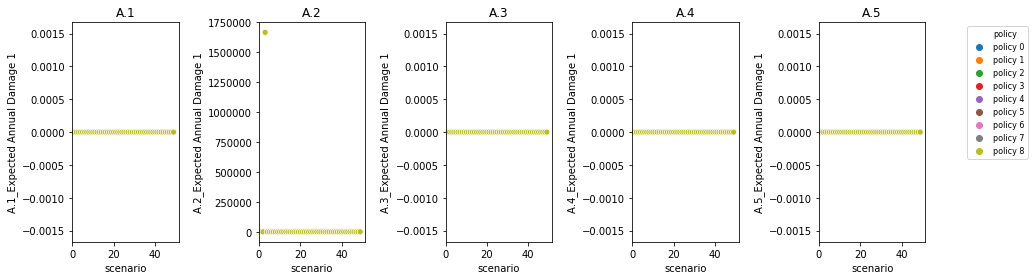

This is timestep 2


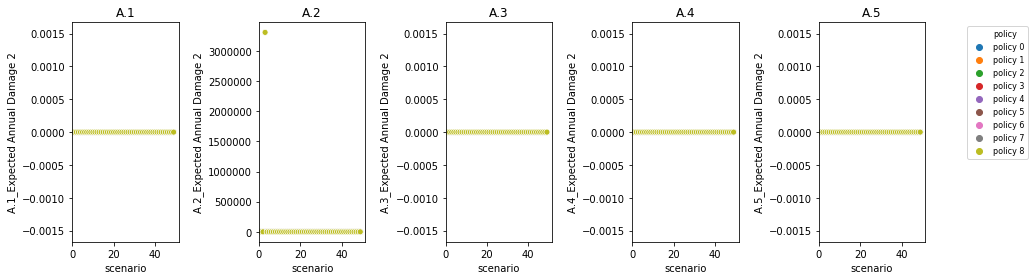

Plot Expected Number of Deaths(Scatterplot)
This is timestep 0


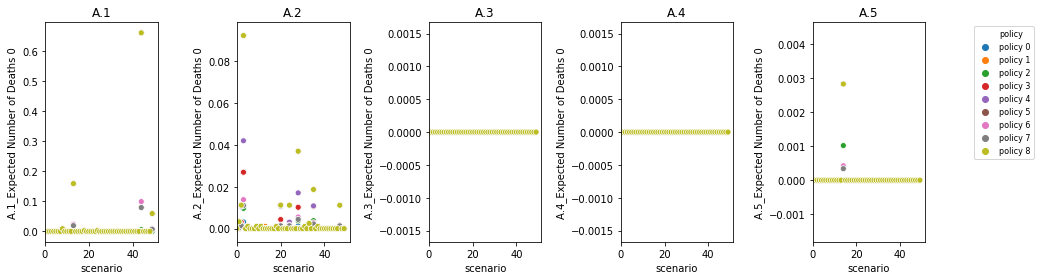

This is timestep 1


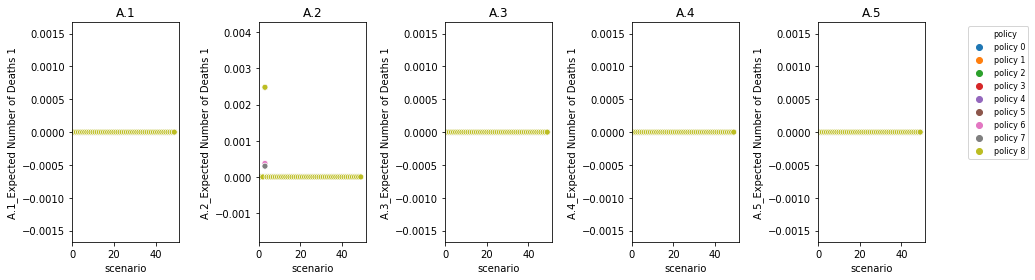

This is timestep 2


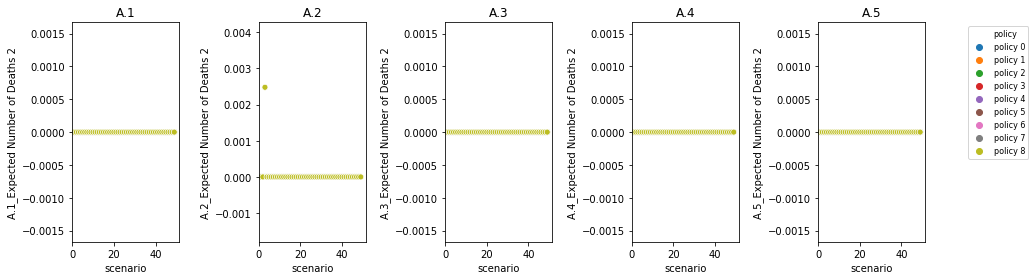

In [26]:
scatter_maker(results, "Expected Annual Damage")
scatter_maker(results, "Expected Number of Deaths")

C:\Users\newbi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\newbi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


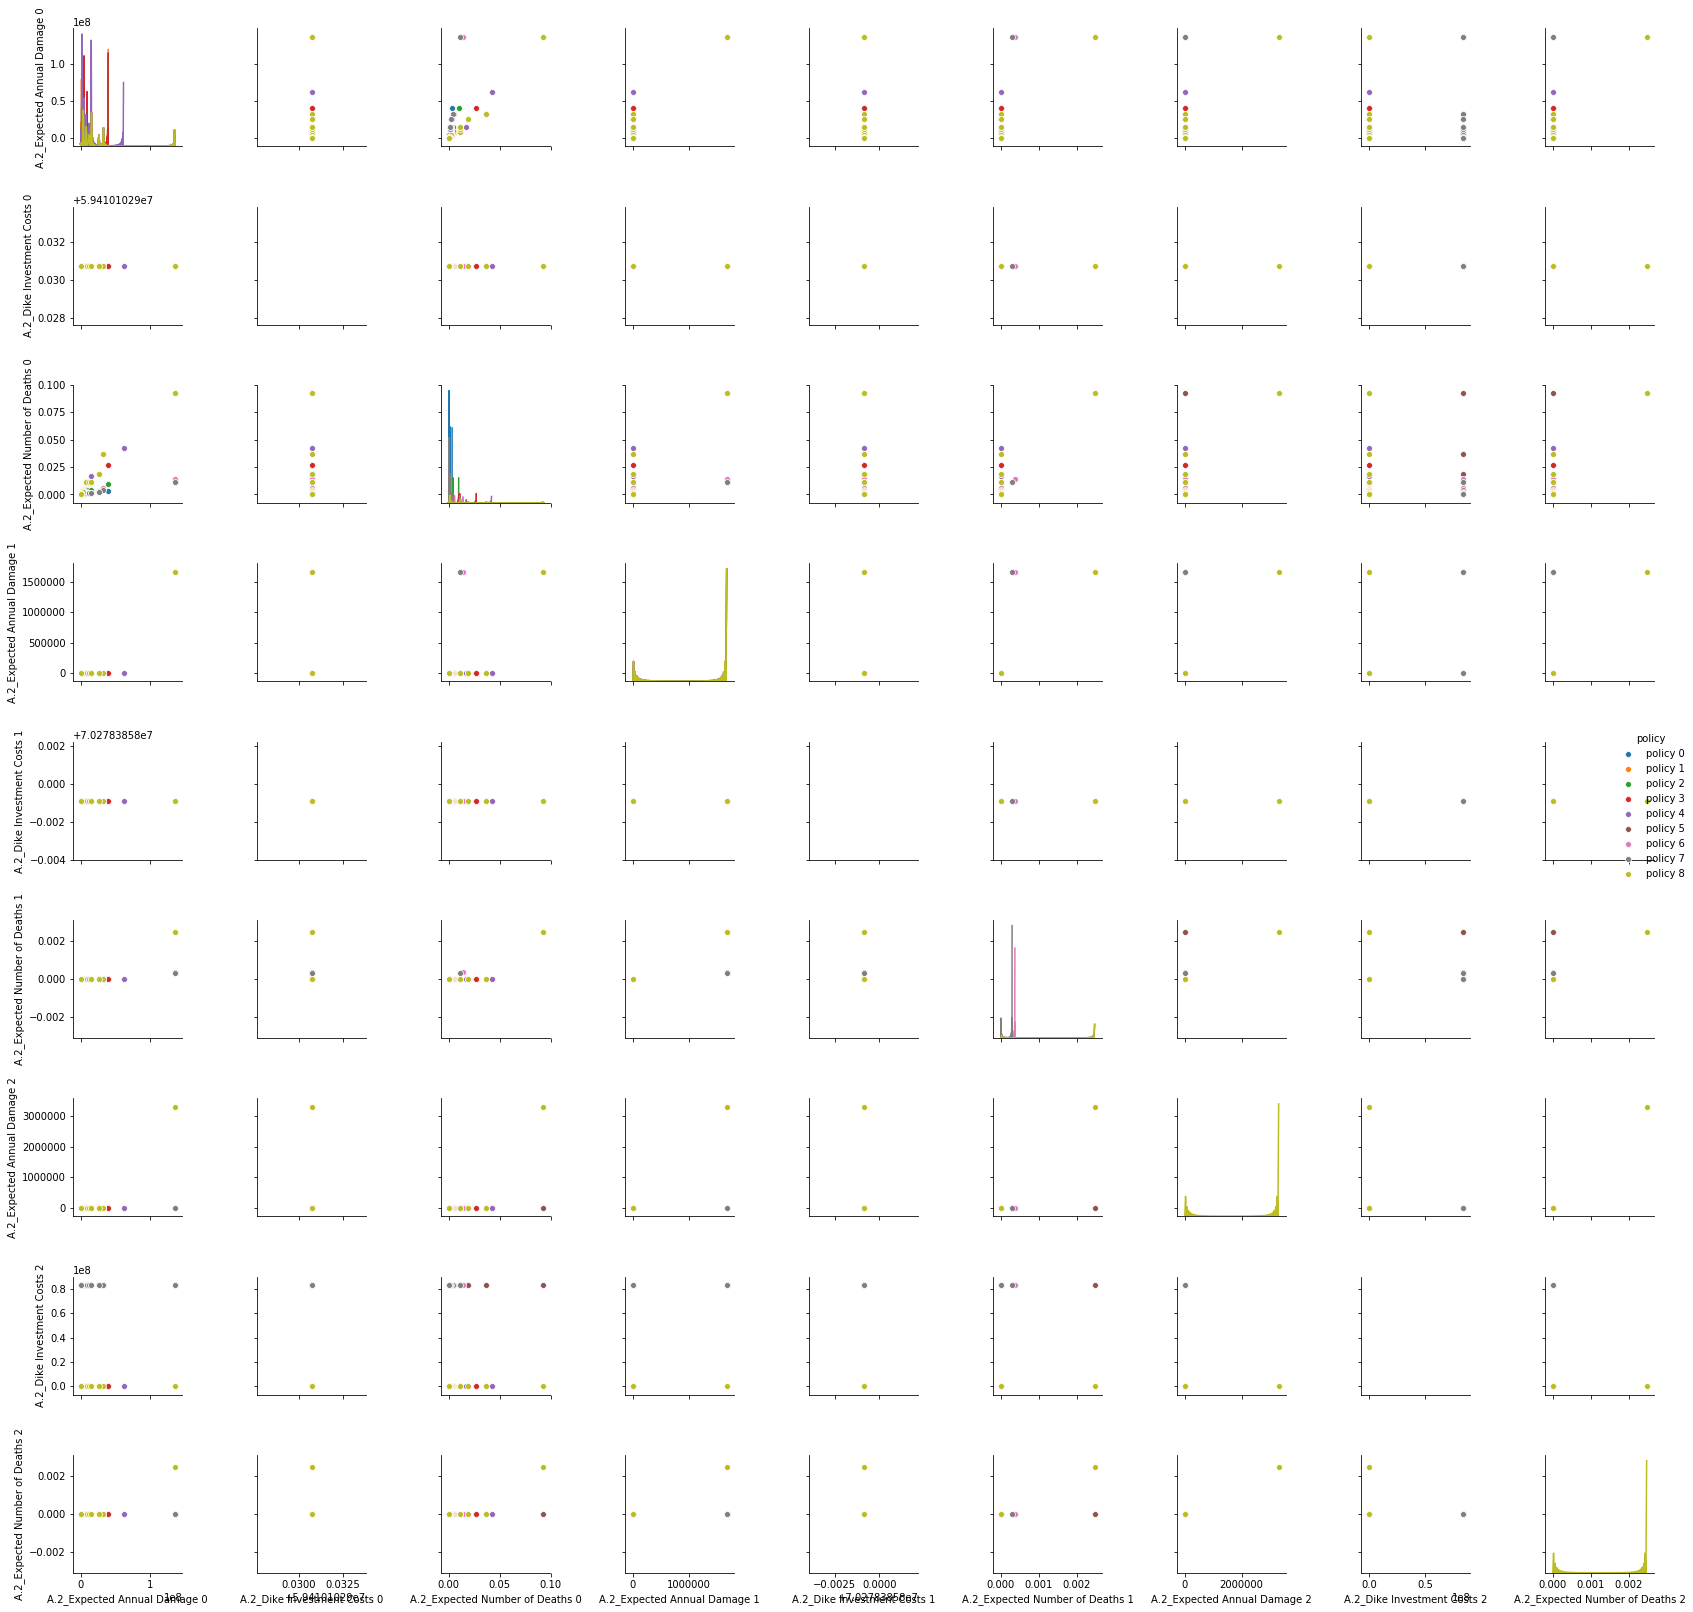

In [27]:
pairplot_maker(results, "A.2")

## Scenario Discovery

In [28]:
aggregate_outcomes(results, "Expected Number of Deaths")
aggregate_outcomes(results, "Expected Annual Damage")

Total Expected Number of Deaths First quantile: 0.0
Total Expected Number of Deaths Mean: 0.02074144993216689
Total Expected Annual Damage First quantile: 0.0
Total Expected Annual Damage Mean: 40708339.680162825


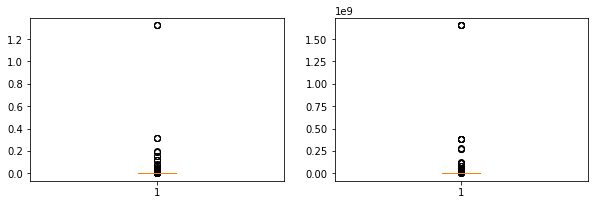

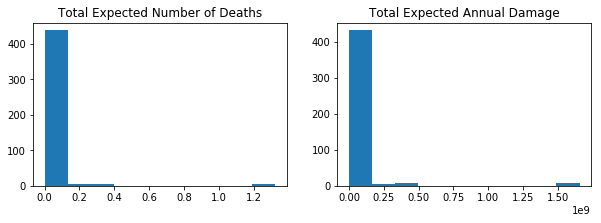

In [29]:
boxplot_histogram_maker(results)

In [30]:
# Set the input and output parameters
# Make sure the outputs are binary (0/1), and specify your interested cases

x = results.iloc[:, :19]
y_deaths = results["Total Expected Number of Deaths"].values
y_deaths = y_deaths < np.percentile()